# Concrete Strength Prediction 



Problem Statement : 

The quality of concrete is determined by its compressive strength, which is measured
using a conventional crushing test on a concrete cylinder. The strength of the concrete
is also a vital aspect in achieving the requisite longevity. It will take 28 days to test
strength, which is a long period. So, what will we do now? We can save a lot of time and
effort by using Data Science to estimate how much quantity of which raw material we
need for acceptable compressive strength



## Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [4]:
# plt.rcParams(figure,figsize=(17,7))
sns.set_style('darkgrid')

## Loading Dataset

In [5]:
df = pd.read_csv('concrete_data.csv')
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.shape

(1030, 9)

In [8]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
klib.missingval_plot(df)

No missing values found in the dataset.


In [10]:
klib.clean_column_names(df)

Long column names detected (>25 characters). Consider renaming the following columns ['concrete_compressive_strength'].


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### Univariate analysis

<Figure size 1800x700 with 0 Axes>

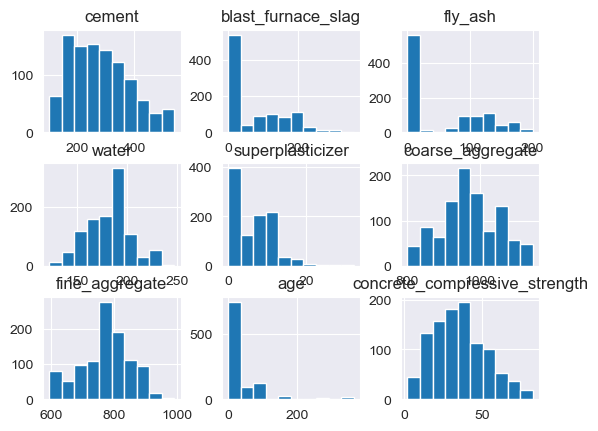

In [11]:
plt.figure(figsize=(18,7))
df.hist()
plt.show()

<Figure size 1800x700 with 0 Axes>

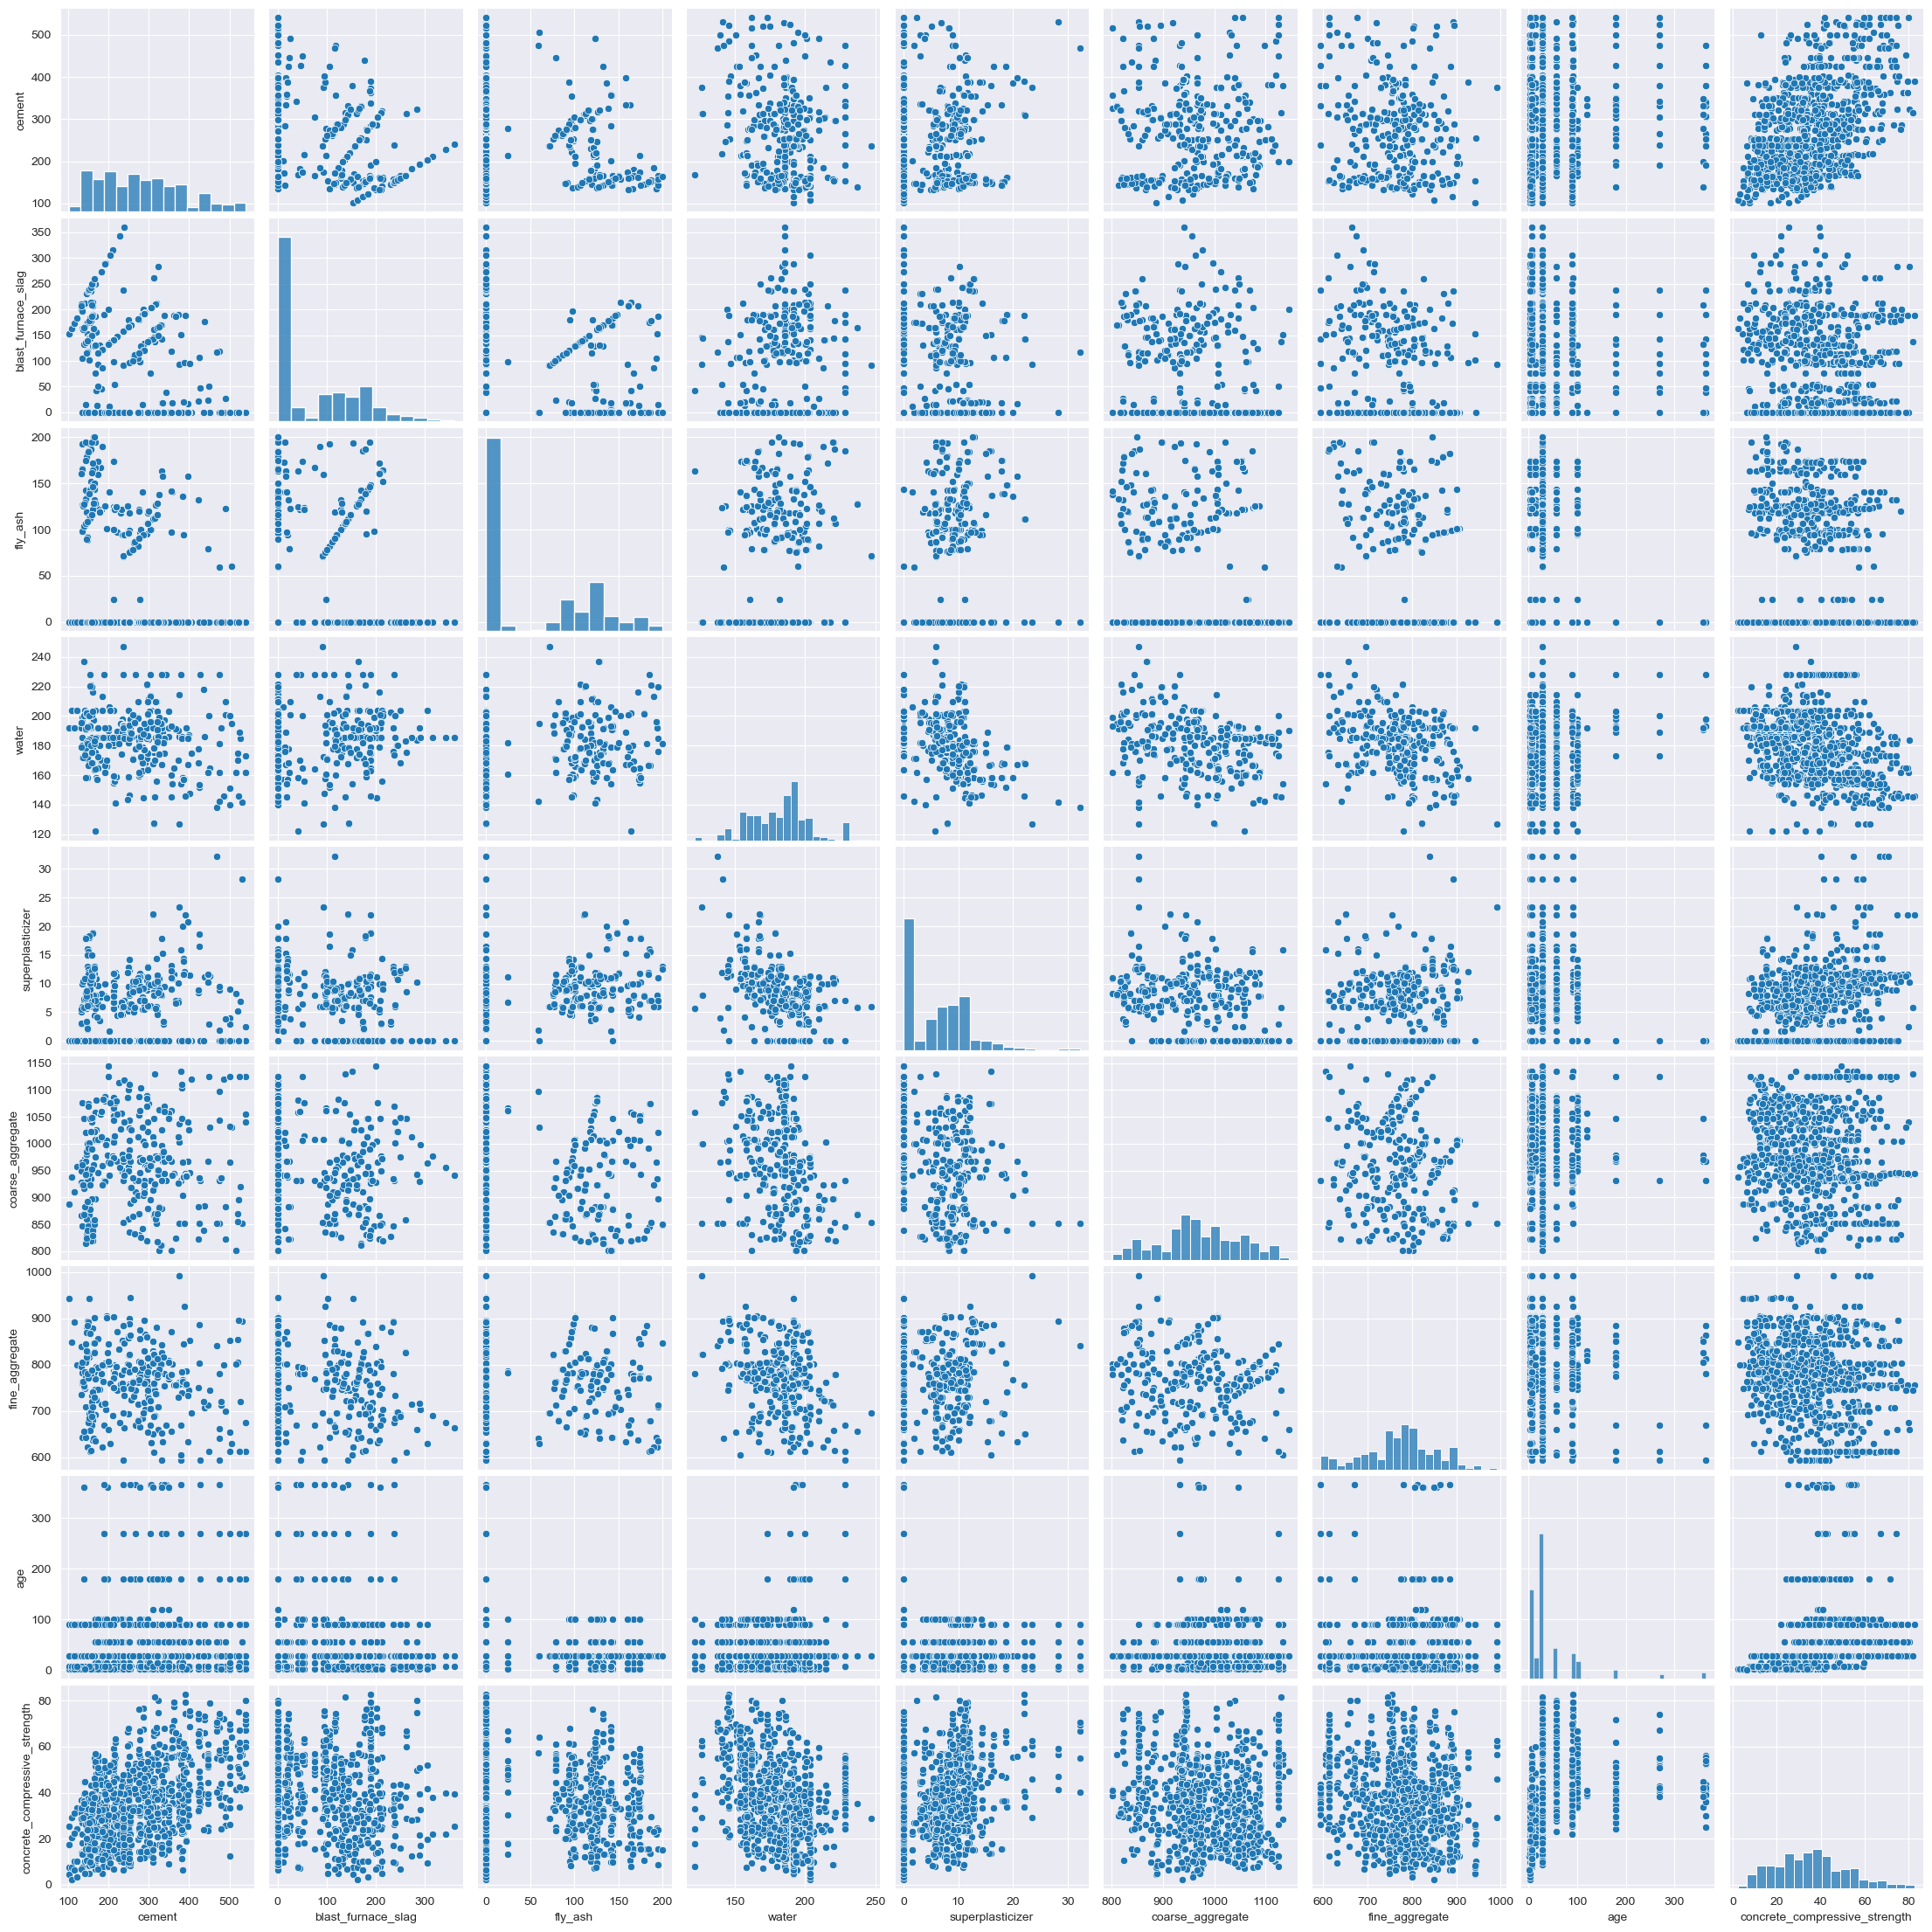

In [12]:
plt.figure(figsize=(18,7))
sns.pairplot(df)

<AxesSubplot:xlabel='concrete_compressive_strength', ylabel='Density'>

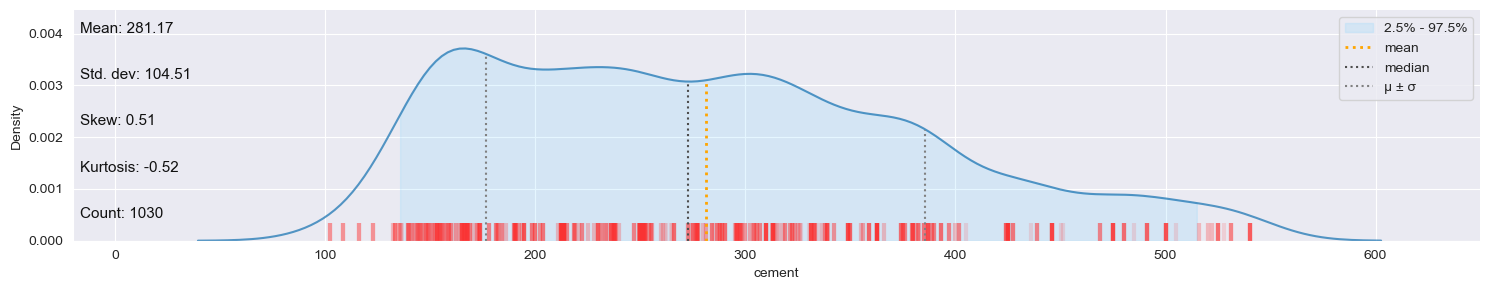

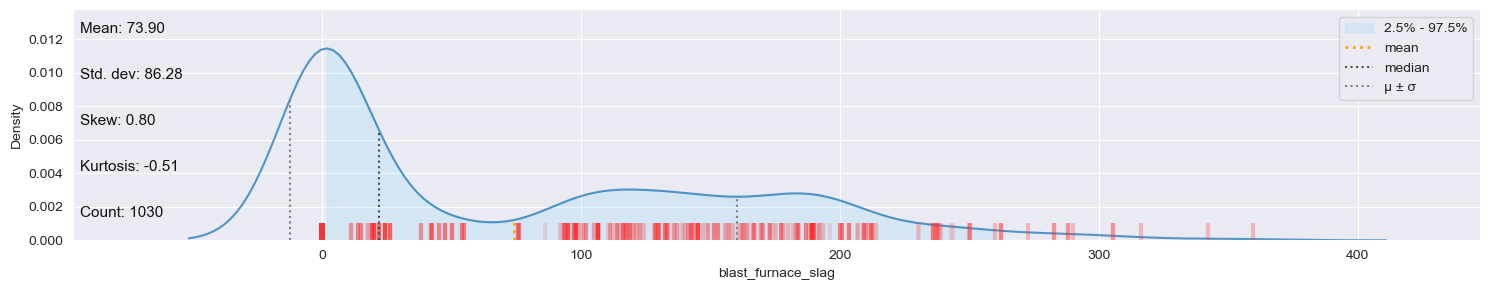

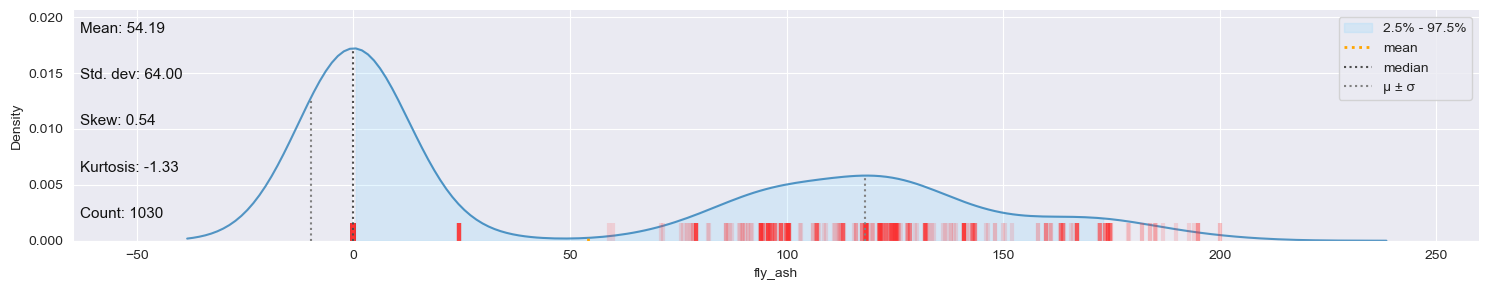

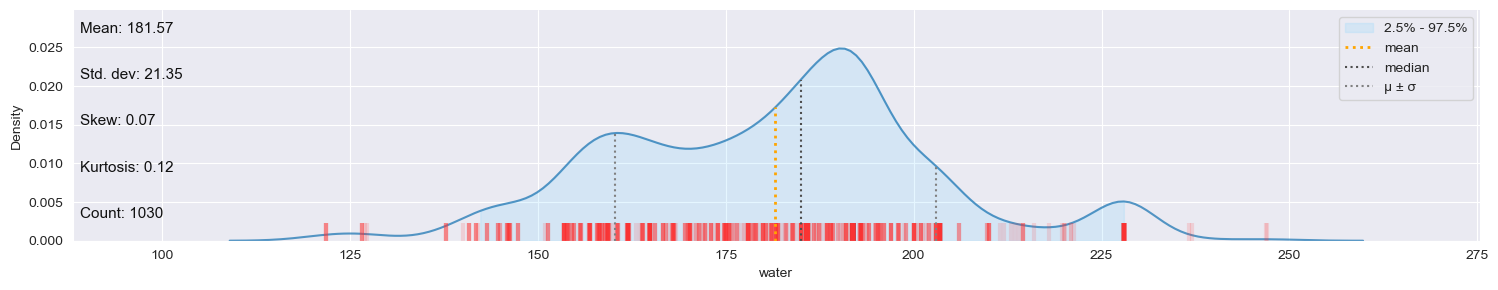

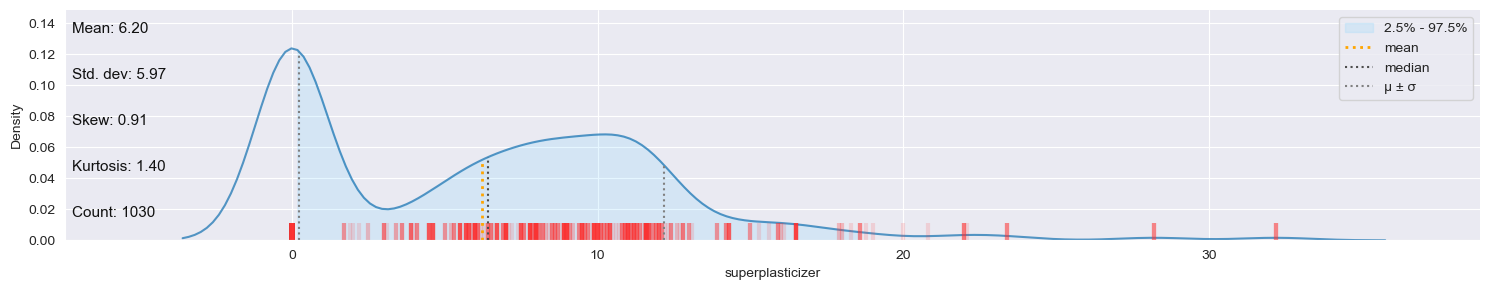

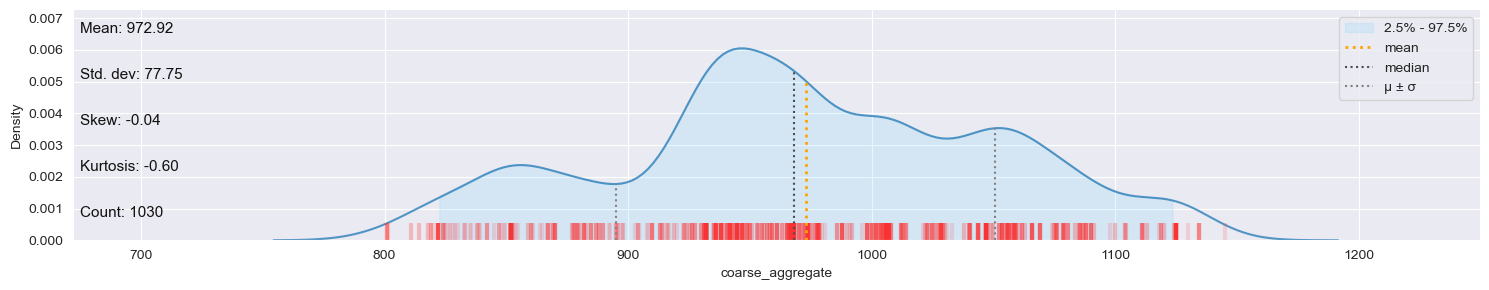

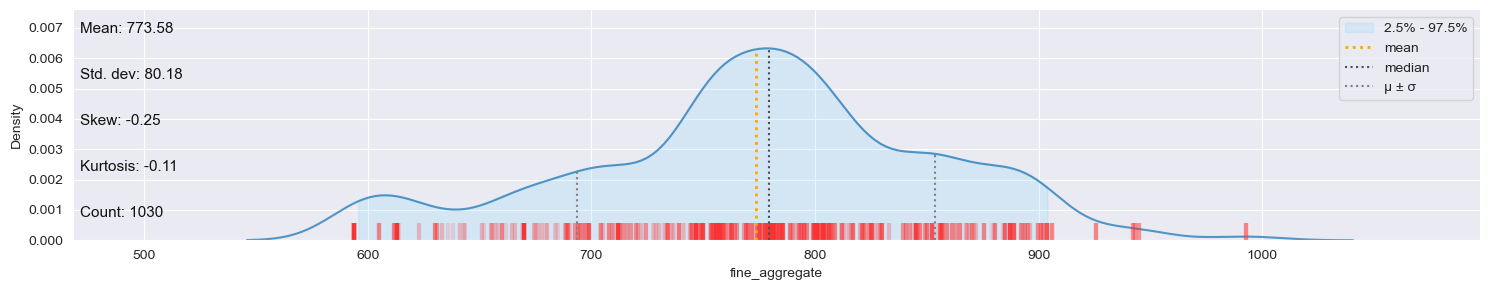

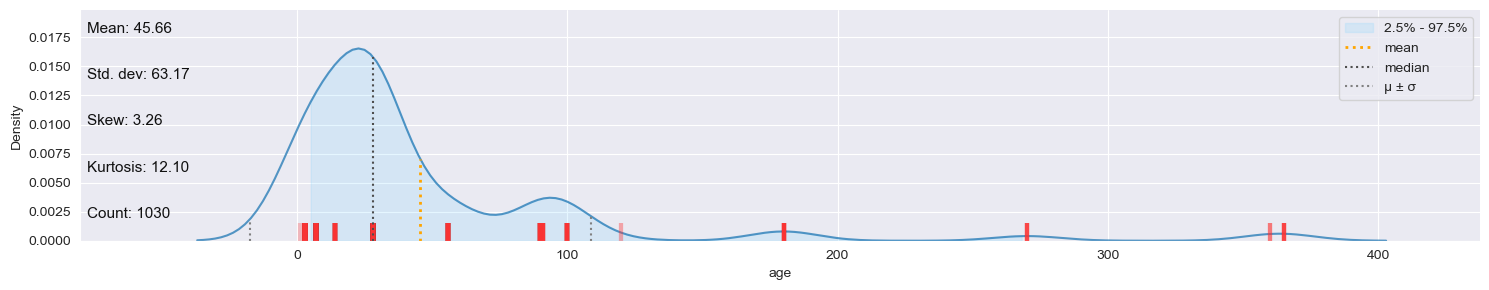

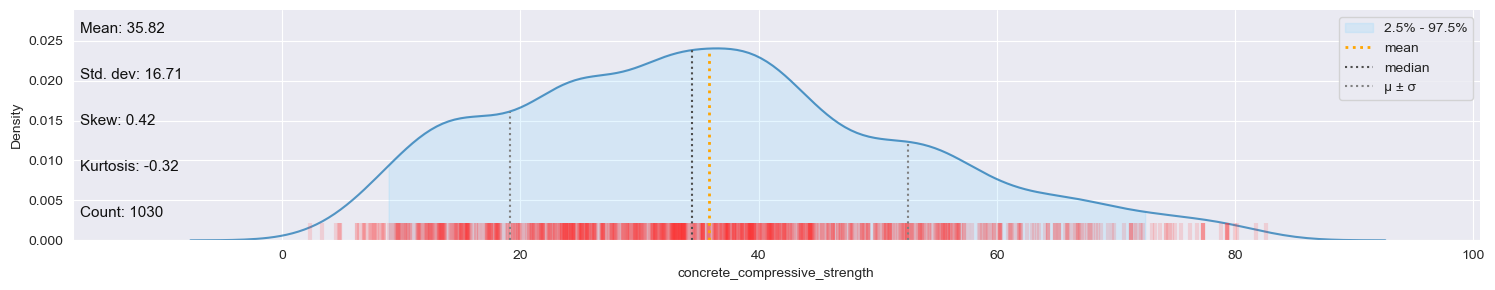

In [13]:
klib.dist_plot(df)

Data is not normally distributed, some columns are skewed

Checking corelation

<AxesSubplot:>

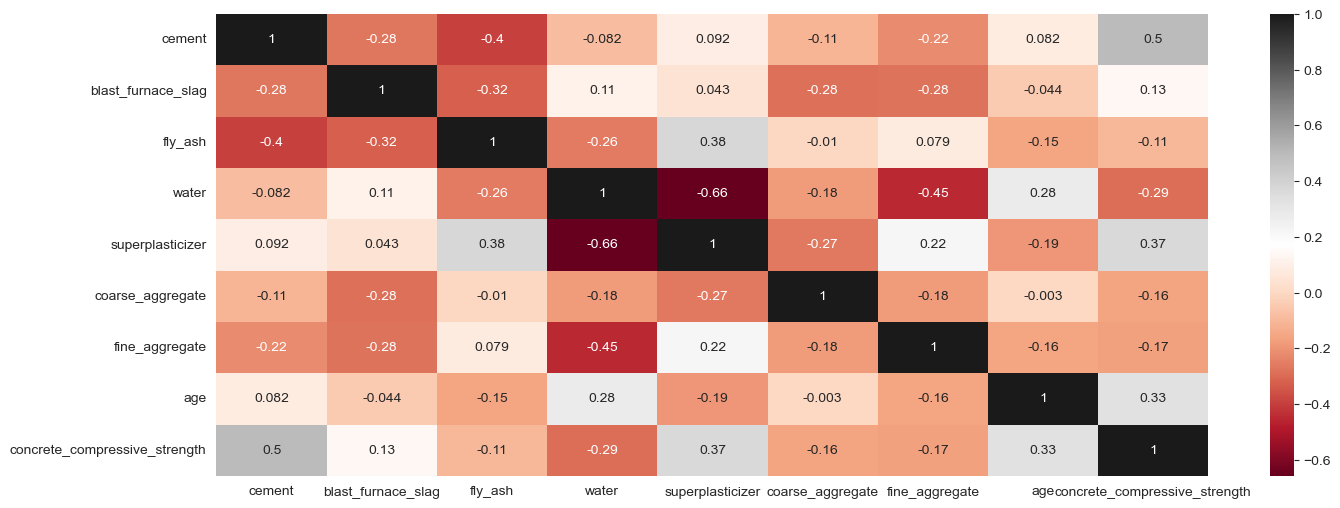

In [14]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot= True, cmap = 'RdGy')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [73]:
klib.corr_plot(df,target='concrete_compressive_strength')

TypeError: corrwith() got an unexpected keyword argument 'numeric_only'

In [19]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age',
       'concrete_compressive_strength'],
      dtype='object')

<AxesSubplot:xlabel='cement', ylabel='concrete_compressive_strength'>

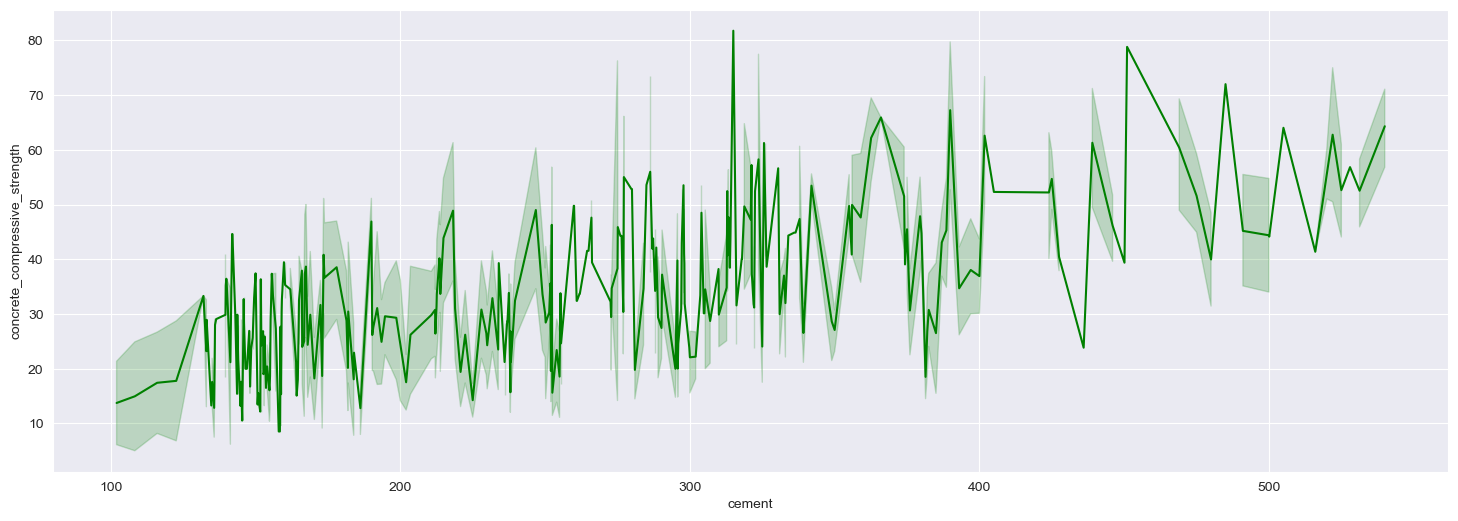

In [20]:
plt.figure(figsize=(18,6))
sns.lineplot(data= df,x='cement',y='concrete_compressive_strength',color = 'green')

<AxesSubplot:xlabel='blast_furnace_slag', ylabel='concrete_compressive_strength'>

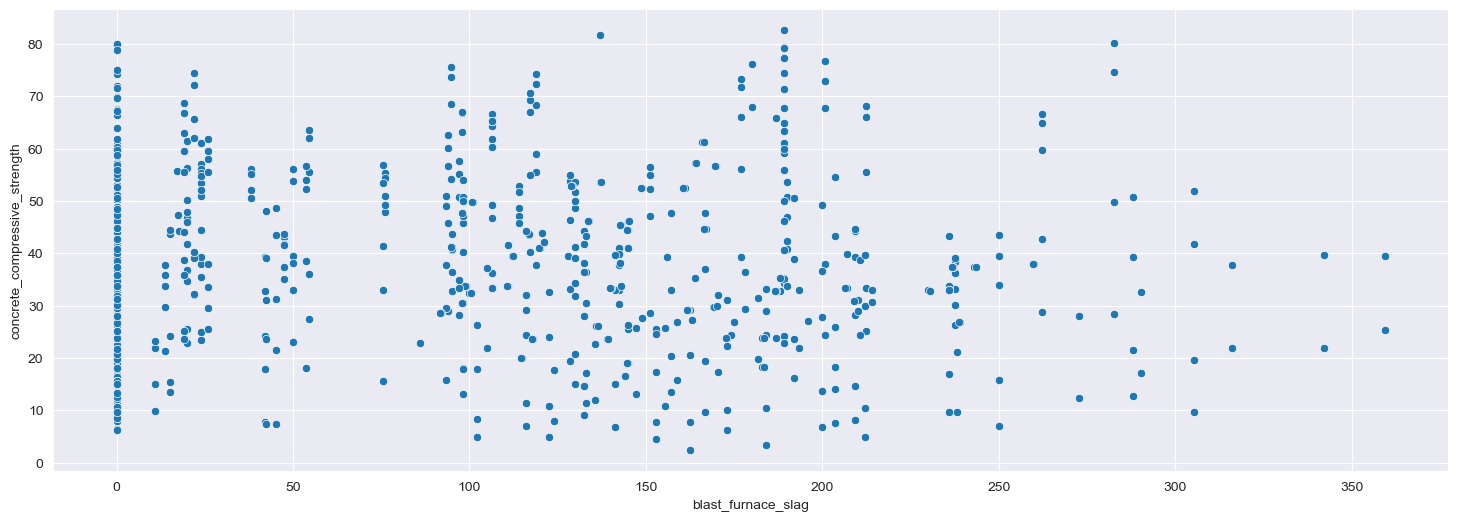

In [21]:
plt.figure(figsize=(18,6))
sns.scatterplot(data= df,x='blast_furnace_slag',y='concrete_compressive_strength')

<AxesSubplot:xlabel='water', ylabel='concrete_compressive_strength'>

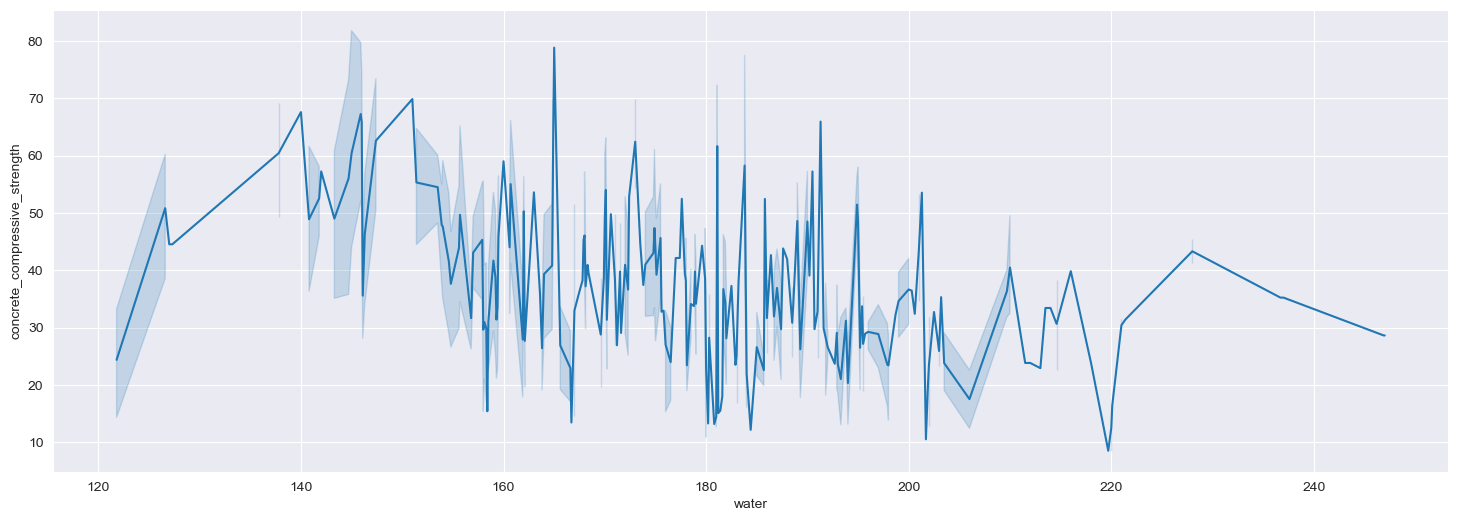

In [22]:
plt.figure(figsize=(18,6))
sns.lineplot(data= df,x='water',y='concrete_compressive_strength')

<AxesSubplot:xlabel='fly_ash', ylabel='concrete_compressive_strength'>

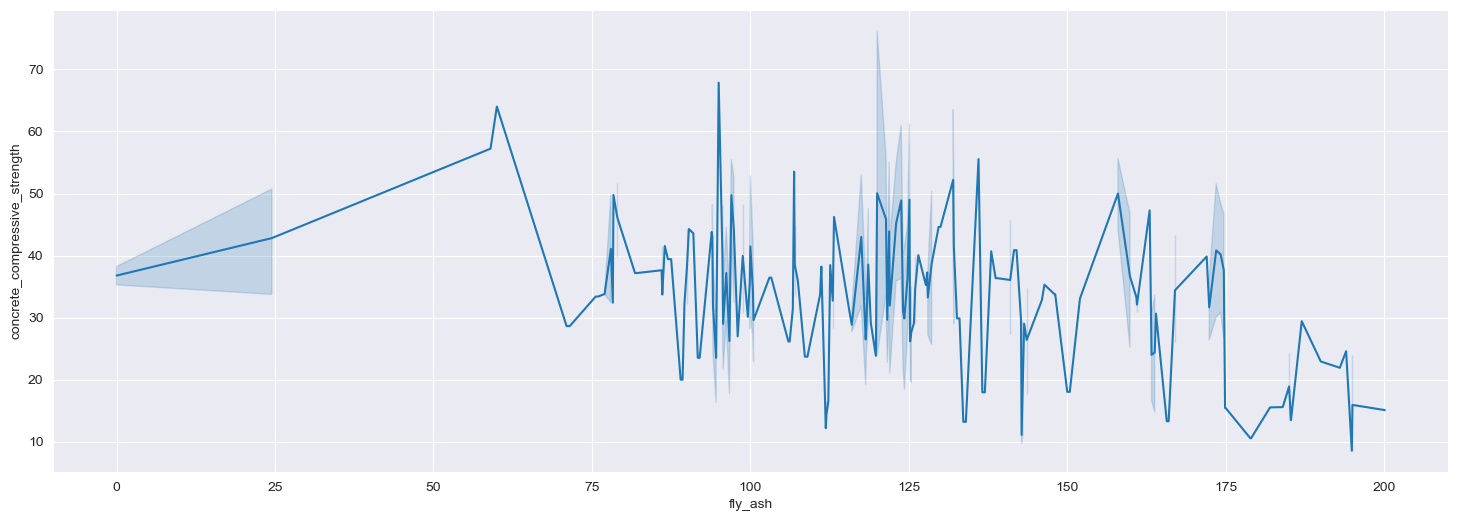

In [23]:
plt.figure(figsize=(18,6))
sns.lineplot(data= df,x='fly_ash',y='concrete_compressive_strength')

<AxesSubplot:xlabel='age', ylabel='concrete_compressive_strength'>

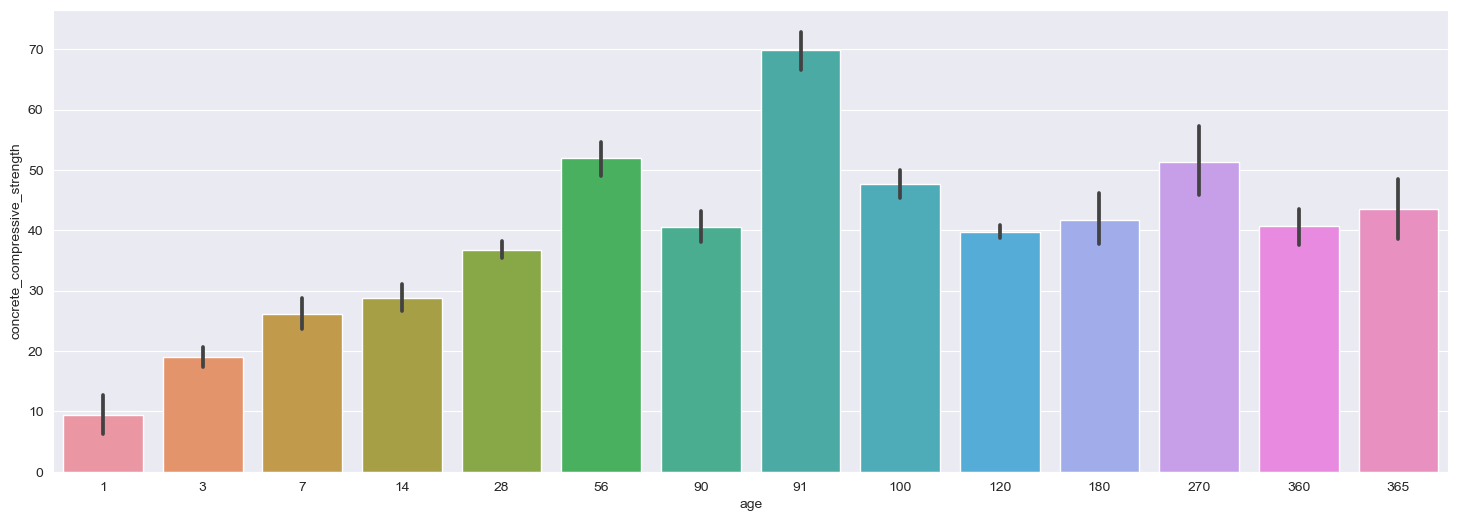

In [24]:
plt.figure(figsize=(18,6))
sns.barplot(data= df,x='age',y='concrete_compressive_strength')

<AxesSubplot:xlabel='fine_aggregate', ylabel='concrete_compressive_strength'>

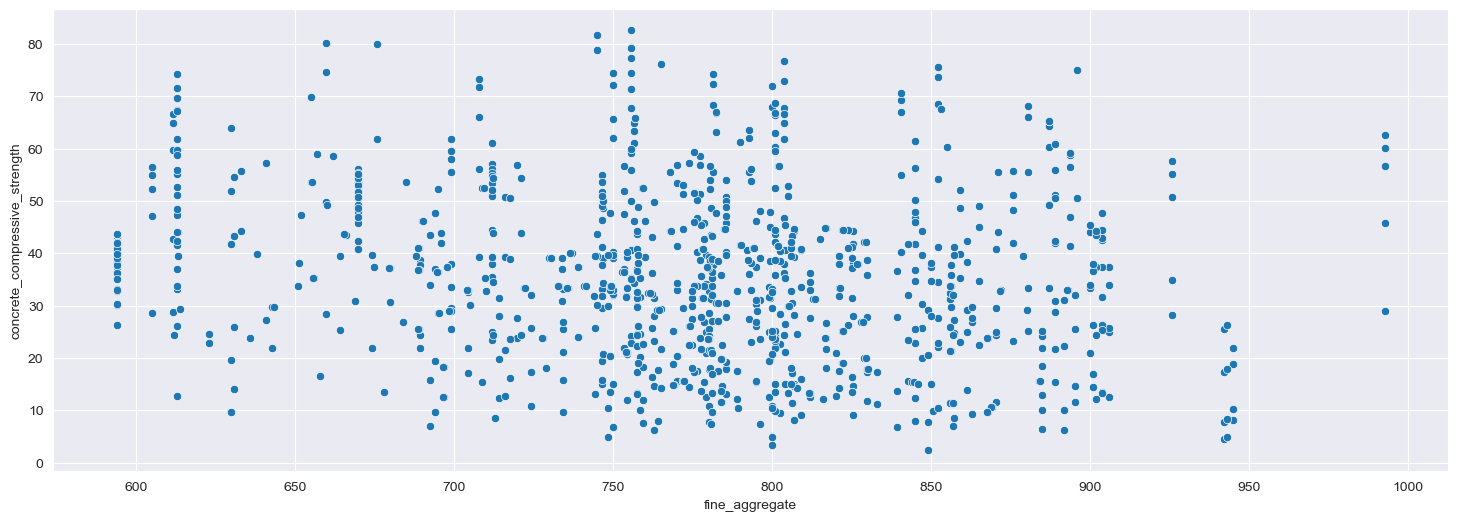

In [25]:
plt.figure(figsize=(18, 6))
sns.scatterplot(data=df, x='fine_aggregate', y='concrete_compressive_strength')

<AxesSubplot:>

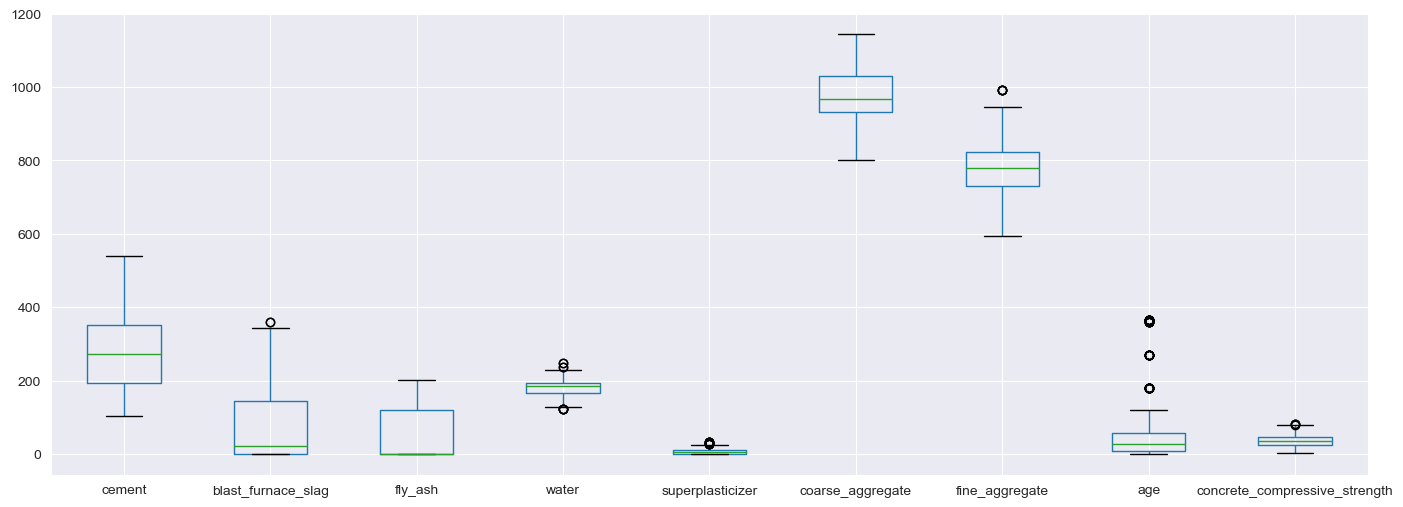

In [26]:
plt.figure(figsize=(17,6))
df.boxplot()

## Machine learning

In [27]:
X = df.drop(columns='concrete_compressive_strength',axis= 1)
y = df['concrete_compressive_strength']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=52)

Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Linear regression

In [32]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

In [33]:
from sklearn import metrics
lr_score = metrics.r2_score(y_test, y_pred)
lr_mae = metrics.mean_absolute_error(y_test, y_pred)
print("Training score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test_scaled, y_test)))


print("")
print("R2 score: {:.2f}".format(metrics.r2_score(y_test, y_pred)))
print("MSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))

Training score: 0.61
Test score: 0.62

R2 score: 0.62
MSE: 110.88
MAE: 8.29


In [ ]:
lr_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred.flatten()
})

lr_prediction.head(10)

,actual,predicted
535,48.85,38.332638
98,55.60,53.193895
653,25.46,20.433766
826,24.39,37.507132
445,36.56,27.337958
275,29.93,27.018019
376,31.97,27.548974
279,13.12,25.899139
285,21.60,26.733881
386,56.83,48.770770


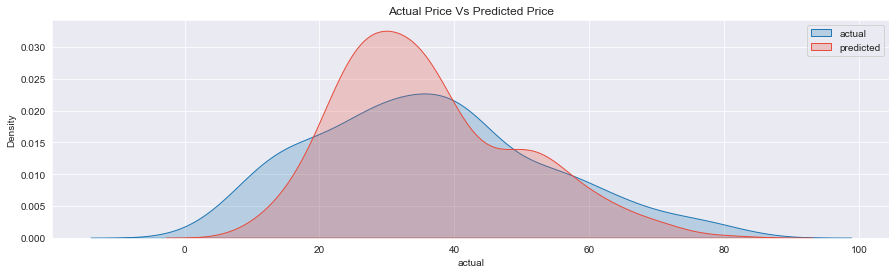

In [ ]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=lr_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=lr_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

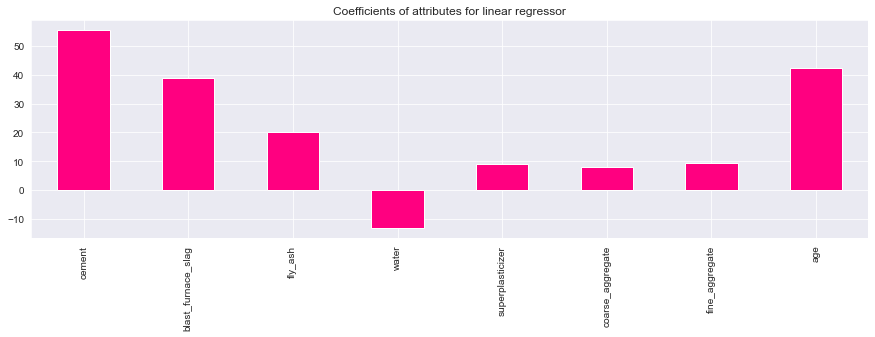

In [ ]:
# coefficients
lr_coefficient = pd.Series(lr.coef_, index=X.columns.tolist())

plt.figure(figsize=(15, 4))
lr_coefficient.plot(kind='bar', color=['#ff0080'])
plt.title("Coefficients of attributes for linear regressor")
plt.show()

### Decision tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor()
dc.fit(X_train_scaled,y_train)
y_pred2 = dc.predict(X_test_scaled)
r2_score(y_test,y_pred2)

0.794281126722346

In [45]:
dt_score = metrics.r2_score(y_test, y_pred2)
dt_mae = metrics.mean_absolute_error(y_test, y_pred2)

print("DT Training score: {:.2f}".format(dc.score(X_train_scaled, y_train)))
print("DT Test score: {:.2f}".format(dc.score(X_test_scaled, y_test)))

print("")
print("DT R2 score: {:.2f}".format(metrics.r2_score(y_test, y_pred2)))
print("DT MSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred2)))
print("DT MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred2)))

DT Training score: 1.00
DT Test score: 0.79

DT R2 score: 0.79
DT MSE: 59.91
DT MAE: 5.01


### KNN

In [48]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled,y_train)
y_pred3 = knn.predict(X_test_scaled)
knn_score = r2_score(y_test,y_pred3)

In [49]:
print("KNN regressor train score: {:.2f}".format(knn.score(X_train_scaled, y_train)))
print("KNN regressor test score: {:.2f}".format(knn.score(X_test_scaled, y_test)))

KNN regressor train score: 0.80
KNN regressor test score: 0.70


### Random forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_scaled,y_train)
y_pred4 = rf.predict(X_test_scaled)
r2_score(y_test,y_pred4)


0.9119134150021777

In [51]:
print("RF Training score: {:.2f}".format(rf.score(X_train_scaled, y_train)))
print("RF Test score: {:.2f}".format(rf.score(X_test_scaled, y_test)))


print("")
print("RF R2 score: {:.2f}".format(metrics.r2_score(y_test, y_pred4)))
print("RF MSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred4)))
print("RF MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred4)))

RF Training score: 0.99
RF Test score: 0.91

RF R2 score: 0.91
RF MSE: 25.65
RF MAE: 3.53


In [52]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics

###  Hyperparameter tuning

In [53]:
rf_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(5,10),
        'n_estimators': (50, 100, 1000, 1500, 2000),
        'random_state': [0,20,30]
    },
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=0,
    n_jobs=-1
)

grid_result = rf_search.fit(X,y)

In [54]:
print("Best estimator for RF: {}".format(grid_result.best_estimator_))

Best estimator for RF: RandomForestRegressor(max_depth=9, random_state=0)


In [55]:
# initiating the model with best estimators
rf_regressor = RandomForestRegressor(max_depth=9, n_estimators=2000, random_state=0)
# fit the model with training data
rf_regressor.fit(X_train, y_train)
# predict on X_test
rf_y_predict = rf_regressor.predict(X_test)

# score
rf_score = metrics.r2_score(y_test, rf_y_predict)
rf_mae = metrics.mean_absolute_error(y_test, rf_y_predict)

print("RF Training score: {:.2f}".format(rf_regressor.score(X_train, y_train)))
print("RF Test score: {:.2f}".format(rf_regressor.score(X_test, y_test)))


print("")
print("RF R2 score: {:.2f}".format(metrics.r2_score(y_test, rf_y_predict)))
print("RF MSE: {:.2f}".format(metrics.mean_squared_error(y_test, rf_y_predict)))
print("RF MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, rf_y_predict)))

RF Training score: 0.98
RF Test score: 0.91

RF R2 score: 0.91
RF MSE: 27.19
RF MAE: 3.74


###  Adaboost regressor

In [83]:
ada_reg = AdaBoostRegressor(random_state=1).fit(X_train_scaled, y_train)

ada_y_predict = ada_reg.predict(X_test_scaled)

# score 
adaboost_score = metrics.r2_score(y_test, ada_y_predict)
adaboost_mae = metrics.mean_absolute_error(y_test, ada_y_predict)

print("AdaBoostReg Train Score: {:.2f}".format(ada_reg.score(X_train_scaled, y_train)))
print("AdaBoostReg Test score: {:.2f}".format(ada_reg.score(X_test_scaled, y_test)))
print("AdaBoostReg R2 score: {:.2f}".format(metrics.r2_score(y_test, ada_y_predict)))
print("AdaBoostReg MSE: {:.2f}".format(metrics.mean_squared_error(y_test, ada_y_predict)))
print("AdaBoostReg MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, ada_y_predict)))


AdaBoostReg Train Score: 0.83
AdaBoostReg Test score: 0.81
AdaBoostReg R2 score: 0.81
AdaBoostReg MSE: 54.93
AdaBoostReg MAE: 6.20


In [ ]:
models_df.plot(kind='barh')

###  Elasticnet Regressor

In [60]:
from sklearn.linear_model import ElasticNet

In [61]:
elnet= ElasticNet(alpha=0.001, l1_ratio=0.62)

elnet.fit(X_train, y_train)
elasticnet_predict = elnet.predict(X_test)

In [62]:
# score
elnet_score = metrics.r2_score(y_test, elasticnet_predict)
elnet_mae = metrics.mean_absolute_error(y_test, elasticnet_predict)

print("ElasticNet Training score: {:.2f}".format(elnet.score(X_train, y_train)))
print("ElasticNet Test score: {:.2f}".format(elnet.score(X_test, y_test)))


print("")
print("ElasticNet R2 score: {:.2f}".format(metrics.r2_score(y_test, elasticnet_predict)))
print("ElasticNet MSE: {:.2f}".format(metrics.mean_squared_error(y_test, elasticnet_predict)))
print("ElasticNet MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, elasticnet_predict)))

ElasticNet Training score: 0.61
ElasticNet Test score: 0.62

ElasticNet R2 score: 0.62
ElasticNet MSE: 110.88
ElasticNet MAE: 8.29


###  Xgboost Regressor

In [63]:
import xgboost as xgb

In [77]:
from xgboost import XGBRegressor
xgbr = xgb.XGBRegressor(verbosity=0) 

XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)


xgbr.fit(X_train_scaled,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [78]:
xg_pred = xgbr.predict(y_test)


In [79]:
xgbr.score(X_train_scaled,y_train)

0.9987048145348512

In [80]:
xgbr.score(X_test_scaled,y_test)

0.9236124463077875

In [81]:
xg_score = metrics.r2_score(y_test, pred)
xg_mae = metrics.mean_absolute_error(y_test, pred)

print("xg Training score: {:.2f}".format(xgbr.score(X_train_scaled, y_train)))
print("xg Test score: {:.2f}".format(xgbr.score(X_test_scaled, y_test)))


print("")
print("xg R2 score: {:.2f}".format(metrics.r2_score(y_test, xg_pred)))
print("xg MSE: {:.2f}".format(metrics.mean_squared_error(y_test, xg_pred)))
print("xg MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, xg_pred)))

xg Training score: 1.00
xg Test score: 0.92

xg R2 score: -0.21
xg MSE: 353.65
xg MAE: 15.60
